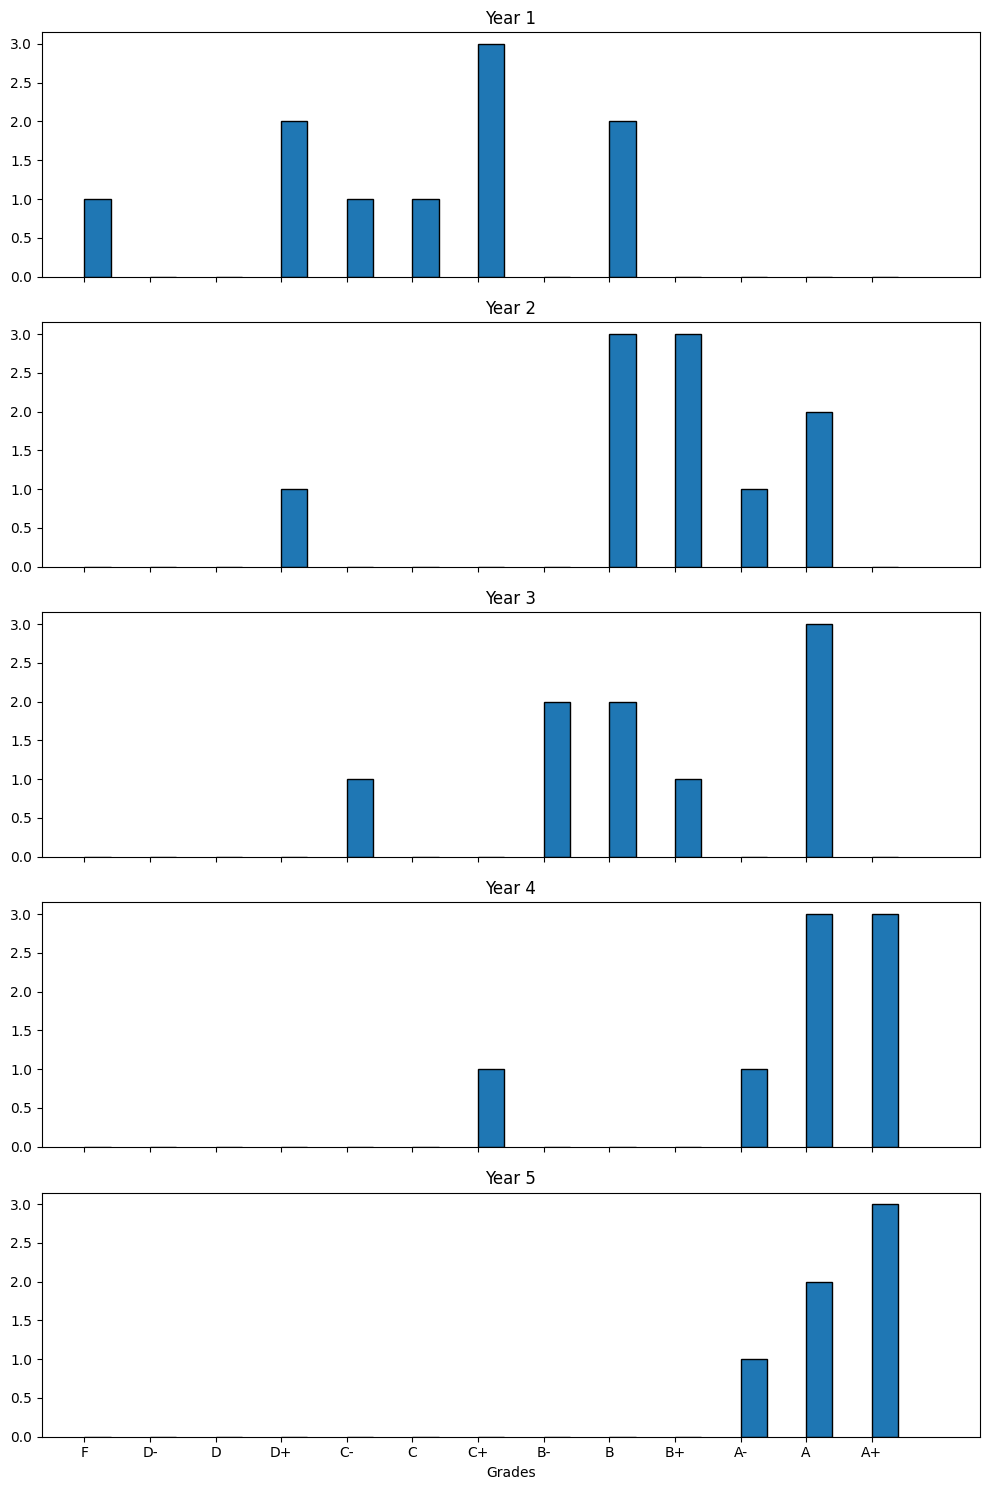

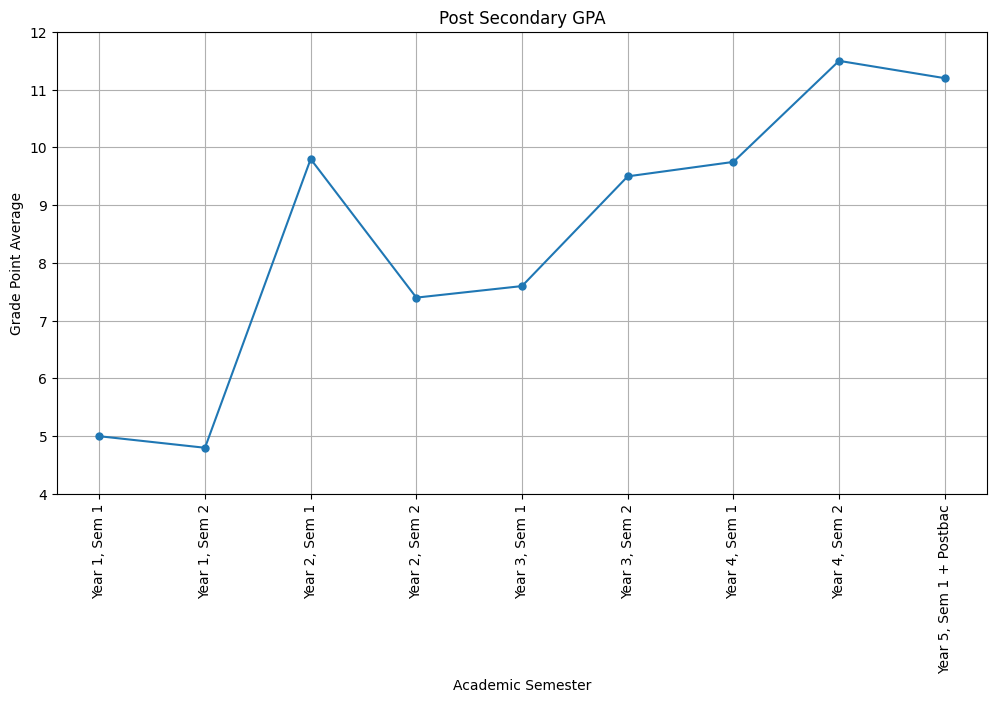

In [1]:
# Optimized Jupyter Notebook for GPA Visualization

# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data preparation
my_dict = {
    'First Year': [8, 3, 6, 0, 8, 6, 5, 4, 3, 6],
    'Second Year': [9, 10, 11, 11, 8, 9, 8, 8, 9, 3],
    'Third Year': [4, 8, 7, 8, 11, 7, 9, 11, 11],
    'Fourth Year': [6, 11, 10, 12, 12, 11, 11, 12],
    'Fifth Year': [12, 10, 11, 11],
    'Postbac': [12]
}

grades_df = pd.DataFrame({key: pd.Series(value) for key, value in my_dict.items()})
all_avg = grades_df.mean()

# Calculate yearly averages
yearly_avgs = {year: grades_df[year].mean() for year in grades_df.columns}
total_avg = grades_df.sum().sum() / 42

# Separate data by semester into a 2D array
sem_grades = [
    [8, 3, 6, 0, 8], [6, 5, 4, 3, 6], [9, 10, 11, 11, 8],
    [9, 8, 8, 9, 3], [4, 8, 7, 8, 11], [7, 9, 11, 11],
    [6, 11, 10, 12], [12, 11, 11, 12], [12, 10, 11, 11, 12]
]

sem_avgs = [np.mean(sem) for sem in sem_grades]

# Create histograms for each academic year
fig, ax = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(10, 15))
years = ['First Year', 'Second Year', 'Third Year', 'Fourth Year', 'Fifth Year']

for i, year in enumerate(years):
    if year == 'Fifth Year':
        grades = sem_grades[8] + my_dict['Postbac']
    else:
        grades = sem_grades[2*i] + sem_grades[2*i+1]
    
    ax[i].hist(grades, bins=np.arange(14), edgecolor='k', width=0.4)
    ax[i].set_title(f'Year {i+1}')
    
ax[-1].set_xlabel('Grades')
ax[-1].set_xticks(np.arange(13))
ax[-1].set_xticklabels(['F', 'D-', 'D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'])

plt.tight_layout()
plt.show()

# Scatter plot for the progression of semester averages
time_series = [
    'Year 1, Sem 1', 'Year 1, Sem 2', 'Year 2, Sem 1', 'Year 2, Sem 2',
    'Year 3, Sem 1', 'Year 3, Sem 2', 'Year 4, Sem 1', 'Year 4, Sem 2',
    'Year 5, Sem 1 + Postbac'
]

df = pd.DataFrame({'time_series': time_series, 'sem_avgs': sem_avgs})
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(time_series, sem_avgs, marker='.', markersize=10)
plt.xticks(rotation=90)
plt.yticks(np.arange(4, 13, step=1))
plt.xlabel('Academic Semester')
plt.ylabel('Grade Point Average')
plt.title('Post Secondary GPA')
plt.grid(True)

plt.show()
